In [0]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.2.0-rc2


In [0]:
from tensorflow.keras.layers import Input,Dense,SimpleRNN,LSTM,GRU,GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [0]:
###building the dataset
#First we will begin with small T,this is a non linear and long distance dataset

T = 10
D = 1
X = []
Y = []
def get_label(x, i1, i2, i3):
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x,-1,-2,-3)#short distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)


In [0]:
#Trying the linear model
i = Input(shape=(T,))
x = Dense(1,activation='sigmoid')(i)
model = Model(i,x)

model.compile(
    loss='binary_crossentropy',
    optimizer = Adam(lr=0.1),
    metrics = ['accuracy'],
)
r = model.fit(
    X[:-N//2],Y[:-N//2],
    epochs=100,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

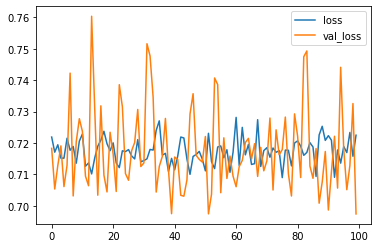

In [0]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

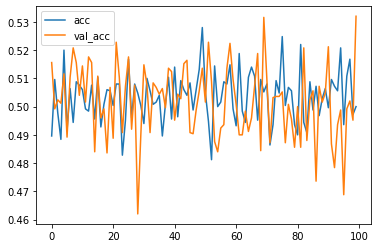

In [0]:

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
#Okay so linear model failed miserably..again ,the loss didn't decrease at all,the accuracy.....well...
#Let's try SimpleRNN


inputs = np.expand_dims(X, -1)
i = Input(shape=(T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
  #optimizer='adam',
  optimizer=Adam(lr=0.01),
  # optimizer=SGD(lr=0.1, momentum=0.9),
  metrics=['accuracy'],
)

In [0]:
# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

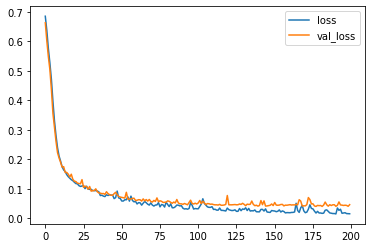

In [0]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
#Voila! the loss decreased!!

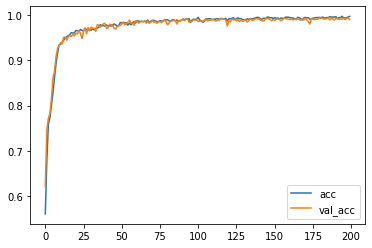

In [0]:
# Plot the loss
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
#Let's try the long distance problem
T = 10
D = 1
X = []
Y = []
def get_label(x, i1, i2, i3):
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x,1,2,3)#long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [0]:
#SimpleRNN
inputs = np.expand_dims(X, -1)
i = Input(shape=(T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
  #optimizer='adam',
  optimizer=Adam(lr=0.01),
  # optimizer=SGD(lr=0.1, momentum=0.9),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

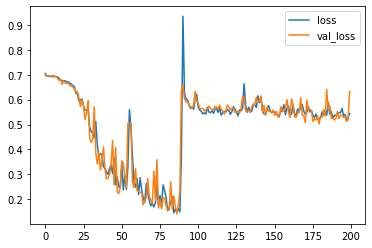

In [0]:
 # Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
#well well well....

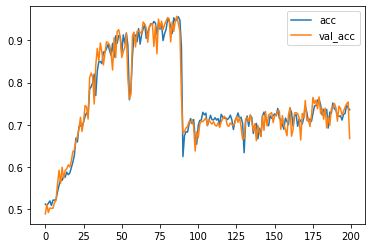

In [0]:
# Plot the loss
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()


In [0]:
#Well as expected SimpleRNN forgot the previous value
#Let's test our LSTM

inputs = np.expand_dims(X, -1)
i = Input(shape=(T, D))
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)


r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)


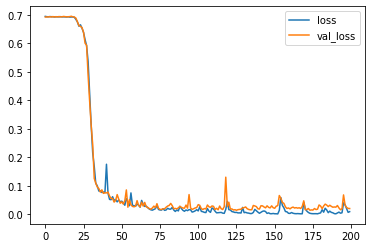

In [18]:
 # Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
#well the loss does decrease that means LSTM is able to learn from the previous values

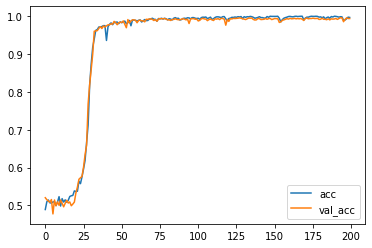

In [19]:
# Plot the loss
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()


In [0]:
#Making the problem harder by increasing the value of T
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 1, 2, 3) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [0]:
inputs = np.expand_dims(X, -1)
i = Input(shape=(T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
  #optimizer='adam',
  optimizer=Adam(lr=0.01),
  # optimizer=SGD(lr=0.1, momentum=0.9),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

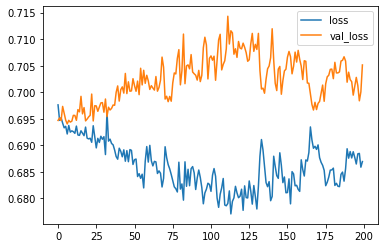

In [22]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

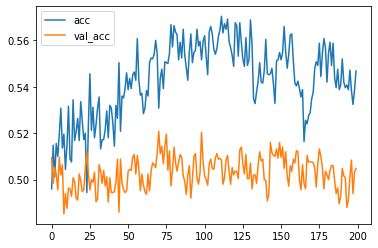

In [23]:
# Plot the loss
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()


In [0]:
#It's getting really hard for the SimpleRNN to learn,so now let's use LSTM
inputs = np.expand_dims(X, -1)


i = Input(shape=(T, D))


x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

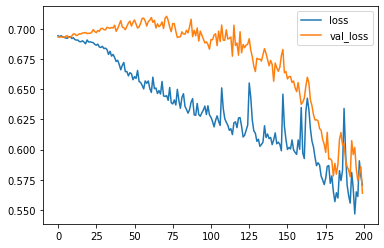

In [25]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

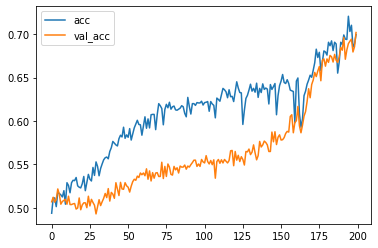

In [26]:
# Plot the loss
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()


In [27]:
#Let us make a GRU too!!!
# Now test our GRU
inputs = np.expand_dims(X, -1)
i = Input(shape=(T, D))

x = GRU(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)


r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6957 - accuracy: 0.4976 - val_loss: 0.6931 - val_accuracy: 0.5172
Epoch 2/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6948 - accuracy: 0.5112 - val_loss: 0.6931 - val_accuracy: 0.5128
Epoch 3/400
79/79 [==============================] - 1s 11ms/step - loss: 0.6944 - accuracy: 0.5156 - val_loss: 0.6939 - val_accuracy: 0.5100
Epoch 4/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6939 - accuracy: 0.5088 - val_loss: 0.6932 - val_accuracy: 0.5104
Epoch 5/400
79/79 [==============================] - 1s 11ms/step - loss: 0.6938 - accuracy: 0.5016 - val_loss: 0.6933 - val_accuracy: 0.5044
Epoch 6/400
79/79 [==============================] - 1s 11ms/step - loss: 0.6926 - accuracy: 0.5112 - val_loss: 0.6935 - val_accuracy: 0.5048
Epoch 7/400
79/79 [==============================] - 1s 11ms/step - loss: 0.6931 - accuracy: 0.5064 - val_loss: 0.6934 - val_accuracy: 0.5196
Epoch 

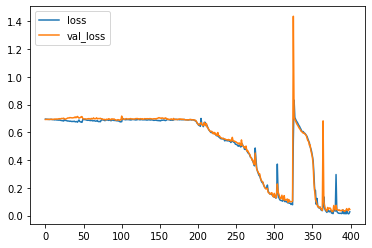

In [28]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


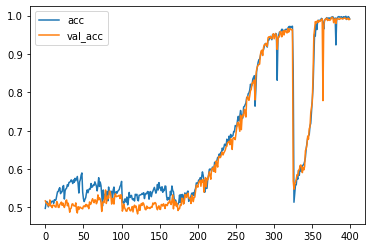

In [29]:
# Plot the loss
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()


In [0]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [0]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)
i = Input(shape=(T, D))

x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

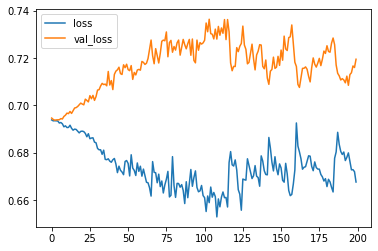

In [32]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


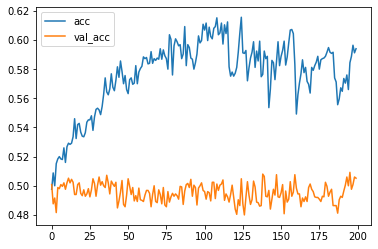

In [33]:
# Plot the loss
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()


In [36]:
#It looks like we broke LSTMs!!!!!
#Since the sequence became too long for even LSTM to not be able to remember the previous values
#We can use GlobalMaxPooling1D to solve this issue
#Let's try that
# Now try a LSTM with Global Max Pooling
inputs = np.expand_dims(X, -1)

i = Input(shape=(T, D))
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

r = model.fit(
  inputs, Y,
  epochs=100,
  validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 1s 18ms/step - loss: 0.6949 - accuracy: 0.4964 - val_loss: 0.6939 - val_accuracy: 0.4952
Epoch 2/100
79/79 [==============================] - 1s 14ms/step - loss: 0.6933 - accuracy: 0.5028 - val_loss: 0.6932 - val_accuracy: 0.5004
Epoch 3/100
79/79 [==============================] - 1s 14ms/step - loss: 0.6936 - accuracy: 0.4912 - val_loss: 0.6937 - val_accuracy: 0.5036
Epoch 4/100
79/79 [==============================] - 1s 14ms/step - loss: 0.6924 - accuracy: 0.5132 - val_loss: 0.6934 - val_accuracy: 0.5128
Epoch 5/100
79/79 [==============================] - 1s 14ms/step - loss: 0.6898 - accuracy: 0.5248 - val_loss: 0.6914 - val_accuracy: 0.5136
Epoch 6/100
79/79 [==============================] - 1s 14ms/step - loss: 0.6951 - accuracy: 0.5152 - val_loss: 0.6925 - val_accuracy: 0.5196
Epoch 7/100
79/79 [==============================] - 1s 14ms/step - loss: 0.6877 - accuracy: 0.5664 - val_loss: 0.6868 - val_accuracy: 0.5344
Epoch 

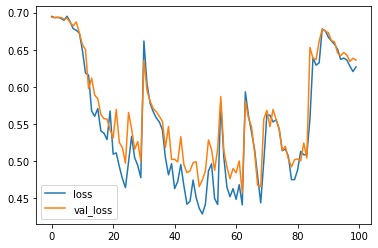

In [37]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

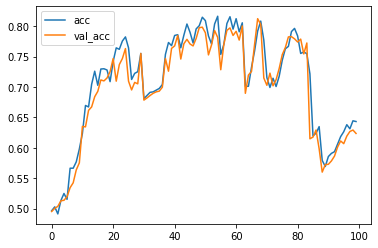

In [38]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()